In [4]:
import numpy as np
import matplotlib.pyplot as plt

from bandit.machine import Machine
from bandit.agent import Agent

In [5]:
runs = np.zeros((1, 10000))

slots = [Machine.random() for _ in range(10)]
agent = Agent(slots, 0.9)
    
for s in range(runs.shape[1]):
    runs[0, s] = agent.draw()

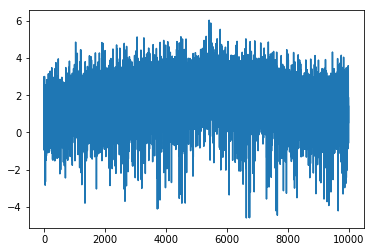

In [6]:
plt.plot(runs[0])
plt.show()

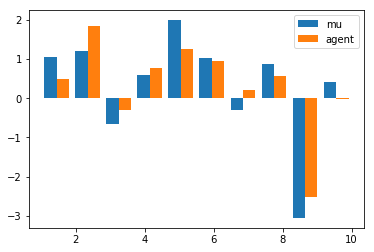

In [7]:
bins = np.tile(np.arange(10) + 1, (2, 1)).T
weights = np.array([[s.mu, agent.get_value(s)] for s in slots])

plt.hist(bins, 10, weights=weights, label=['mu', 'agent'])
plt.legend()
plt.show()

In [ ]:
num_runs = 500
runs = np.zeros((num_runs*2, 10000))

for r in range(runs.shape[0]):    
    slots = [Machine.random() for _ in range(10)]
    
    if r < num_runs:
        agent = Agent(slots, 0.9, "average")
    else:
        agent = Agent(slots, 0.9, 0.1)
        
    for s in range(runs.shape[1]):
        runs[r, s] = agent.draw()

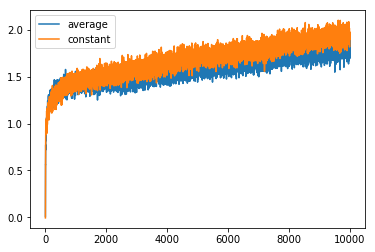

In [18]:
plt.plot(np.mean(runs[:num_runs], axis=0), label="average")
plt.plot(np.mean(runs[num_runs:], axis=0), label="constant")
plt.legend()
plt.show()